In [2]:
import pandas as pd

My dataset is about oranges, their features and the target variable is a quality of an orange

https://www.kaggle.com/datasets/shruthiiiee/orange-quality?select=Orange+Quality+Data.csv

In [3]:
data = pd.read_csv('orange_quality_data.csv')
data

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


At first I looked at ranges and percentiles of numeric variables to determine trashholds for ordinal scale

In [4]:
data.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


Then I renamed columns for comfortable work

In [5]:
data = data.rename(columns = {'Size (cm)':'size', \
                    'Weight (g)':'weight', \
                    'Brix (Sweetness)':'brix', \
                     'pH (Acidity)':'ph', \
                     'Softness (1-5)':'softness', \
                      'HarvestTime (days)':'harvest_time', \
                      'Ripeness (1-5)':'ripeness', \
                      'Color':'color', \
                       'Variety':'variety', \
                      'Blemishes (Y/N)':'has_blemishes', \
                       'Quality (1-5)':'quality'})
data.head()

,size,weight,brix,ph,softness,harvest_time,ripeness,color,variety,has_blemishes,quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


I deleted variety, because it's very noisy

In [6]:
data = data.drop('variety', axis=1)
data.head()

,size,weight,brix,ph,softness,harvest_time,ripeness,color,has_blemishes,quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Y (Minor),4.5


Then I transformed target variable quality into binary form, because I want to predict if an orange has good quality or bad

In [7]:
data['quality'] = data['quality'].apply(lambda x: 1 if x > 3.5 else 0)
data.head()

,size,weight,brix,ph,softness,harvest_time,ripeness,color,has_blemishes,quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,N,1
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,N,1
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,N,1
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,N,0
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Y (Minor),1


Then I built countplots for numeric variable to find more precise bins for ordinal scale

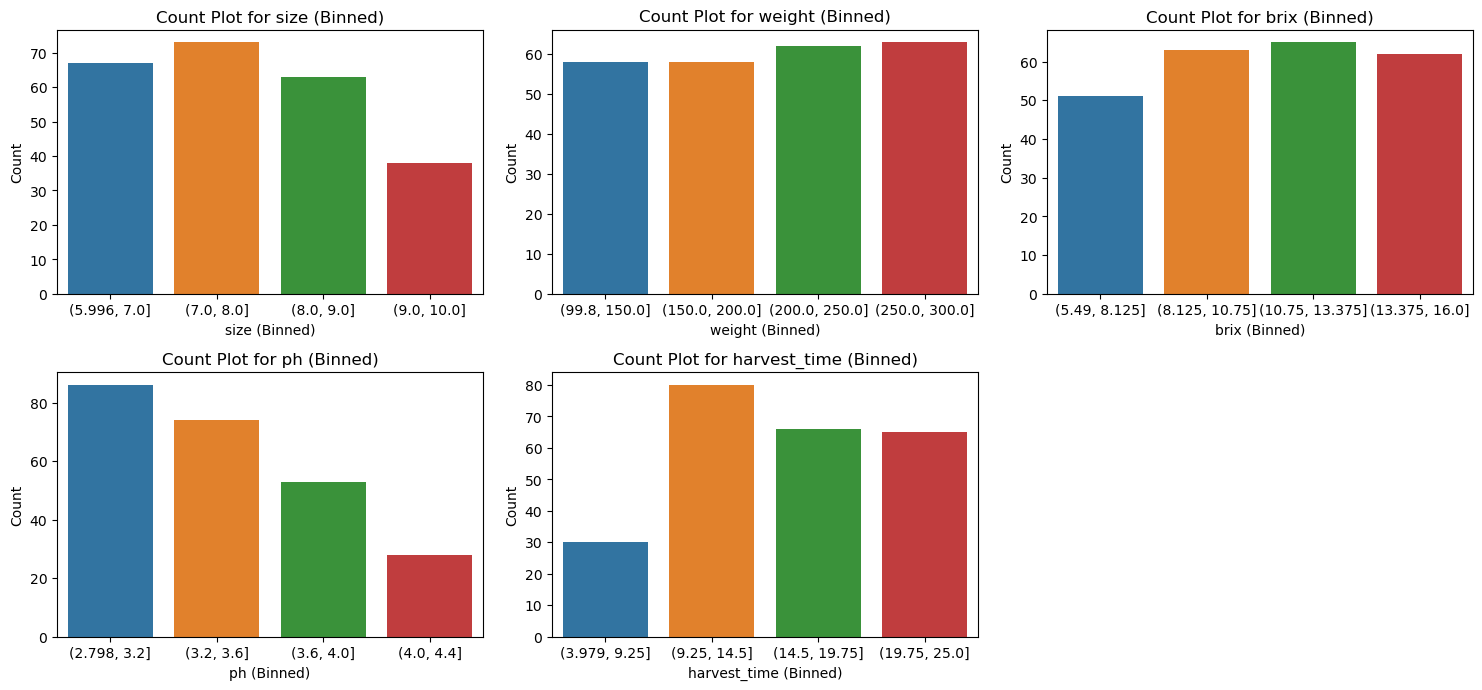

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['size', 'weight', 'brix', 'ph', 'harvest_time']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    num_bins = 4
    
    data[f'{column}_binned'] = pd.cut(data[column], bins=num_bins)
    
    plt.subplot(3, 3, i)
    sns.countplot(x=f'{column}_binned', data=data)
    plt.title(f'Count Plot for {column} (Binned)')
    plt.xlabel(f'{column} (Binned)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

I decided to scale variables size, weight, brix, ph and harvest_time by ordinal scale with 4 bins

In [9]:
data['size_ge_5.9'] = (data['size'] >= 5.9).astype(int)
data['size_ge_7'] = (data['size'] >= 7).astype(int)
data['size_ge_8'] = (data['size'] >= 8).astype(int)
data['size_ge_9'] = (data['size'] >= 9).astype(int)

data['weight_ge_99'] = (data['weight'] >= 99).astype(int)
data['weight_ge_150'] = (data['weight'] >= 150).astype(int)
data['weight_ge_200'] = (data['weight'] >= 200).astype(int)
data['weight_ge_250'] = (data['weight'] >= 250).astype(int)

data['brix_ge_5.4'] = (data['brix'] >= 5.4).astype(int)
data['brix_ge_8.125'] = (data['brix'] >= 8.125).astype(int)
data['brix_ge_10.75'] = (data['brix'] >= 10.75).astype(int)
data['brix_ge_13.375'] = (data['brix'] >= 13.375).astype(int)

data['ph_ge_2.7'] = (data['ph'] >= 2.7).astype(int)
data['ph_ge_3.2'] = (data['ph'] >= 3.2).astype(int)
data['ph_ge_3.6'] = (data['ph'] >= 3.6).astype(int)
data['ph_ge_4'] = (data['ph'] >= 4).astype(int)

data['harvest_time_ge_3.9'] = (data['harvest_time'] >= 3.9).astype(int)
data['harvest_time_ge_9.5'] = (data['harvest_time'] >= 9.5).astype(int)
data['harvest_time_ge_14.5'] = (data['harvest_time'] >= 14.5).astype(int)
data['harvest_time_ge_19.7'] = (data['harvest_time'] >= 19.7).astype(int)

data.drop(columns=['size', 'weight', 'brix', 'ph', 'harvest_time', 'size_binned', 'weight_binned', 'brix_binned', 'ph_binned', 'harvest_time_binned'], inplace=True)
data.head()

,softness,ripeness,color,has_blemishes,quality,size_ge_5.9,size_ge_7,size_ge_8,size_ge_9,weight_ge_99,...,brix_ge_10.75,brix_ge_13.375,ph_ge_2.7,ph_ge_3.2,ph_ge_3.6,ph_ge_4,harvest_time_ge_3.9,harvest_time_ge_9.5,harvest_time_ge_14.5,harvest_time_ge_19.7
0,2.0,4.0,Orange,N,1,1,1,0,0,1,...,1,0,1,1,0,0,1,1,0,0
1,3.0,4.5,Deep Orange,N,1,1,1,1,0,1,...,0,0,1,1,0,0,1,1,0,0
2,1.0,5.0,Light Orange,N,1,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,0
3,4.0,3.5,Orange-Red,N,0,1,1,1,1,1,...,0,0,1,1,1,0,1,1,1,1
4,2.5,5.0,Orange,Y (Minor),1,1,1,1,0,1,...,1,0,1,1,0,0,1,1,0,0


Variables softness and ripeness are scores with values from 1 to 5, I decided to simplify these variables to a binary form

In [10]:
data['softness'] = data['softness'].apply(lambda x: 1 if x >= 3 else 0)
data['ripeness'] = data['ripeness'].apply(lambda x: 1 if x >= 3 else 0)
data.head()

,softness,ripeness,color,has_blemishes,quality,size_ge_5.9,size_ge_7,size_ge_8,size_ge_9,weight_ge_99,...,brix_ge_10.75,brix_ge_13.375,ph_ge_2.7,ph_ge_3.2,ph_ge_3.6,ph_ge_4,harvest_time_ge_3.9,harvest_time_ge_9.5,harvest_time_ge_14.5,harvest_time_ge_19.7
0,0,1,Orange,N,1,1,1,0,0,1,...,1,0,1,1,0,0,1,1,0,0
1,1,1,Deep Orange,N,1,1,1,1,0,1,...,0,0,1,1,0,0,1,1,0,0
2,0,1,Light Orange,N,1,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,0
3,1,1,Orange-Red,N,0,1,1,1,1,1,...,0,0,1,1,1,0,1,1,1,1
4,0,1,Orange,Y (Minor),1,1,1,1,0,1,...,1,0,1,1,0,0,1,1,0,0


And then I scaled softness and ripeness with dichotomic scale

In [11]:
data['is_softness'] = data['softness'].astype(int)
data['is_not_softness'] = (data['softness'] == 0).astype(int)

data['is_ripeness'] = data['ripeness'].astype(int)
data['is_not_ripeness'] = (data['ripeness'] == 0).astype(int)

data.drop(columns=['softness', 'ripeness'], inplace=True)
data.head()

,color,has_blemishes,quality,size_ge_5.9,size_ge_7,size_ge_8,size_ge_9,weight_ge_99,weight_ge_150,weight_ge_200,...,ph_ge_3.6,ph_ge_4,harvest_time_ge_3.9,harvest_time_ge_9.5,harvest_time_ge_14.5,harvest_time_ge_19.7,is_softness,is_not_softness,is_ripeness,is_not_ripeness
0,Orange,N,1,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,1,1,0
1,Deep Orange,N,1,1,1,1,0,1,1,1,...,0,0,1,1,0,0,1,0,1,0
2,Light Orange,N,1,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
3,Orange-Red,N,0,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,0
4,Orange,Y (Minor),1,1,1,1,0,1,1,1,...,0,0,1,1,0,0,0,1,1,0


I scaled categorical variable color with nominal scale

In [12]:
one_hot = pd.get_dummies(data['color'], prefix='color')

data = pd.concat([data, one_hot], axis=1)

data.drop(columns=['color'], inplace=True)
data.head()

,has_blemishes,quality,size_ge_5.9,size_ge_7,size_ge_8,size_ge_9,weight_ge_99,weight_ge_150,weight_ge_200,weight_ge_250,...,harvest_time_ge_19.7,is_softness,is_not_softness,is_ripeness,is_not_ripeness,color_Deep Orange,color_Light Orange,color_Orange,color_Orange-Red,color_Yellow-Orange
0,N,1,1,1,0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,N,1,1,1,1,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,0
2,N,1,1,0,0,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
3,N,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,0,0,1,0
4,Y (Minor),1,1,1,1,0,1,1,1,0,...,0,0,1,1,0,0,0,1,0,0


Then I binarized variable has_blemishes into only 2 classes (has blemishes or not) and scaled it with dichotomic scale 

In [13]:
data['is_has_blemishes'] = data['has_blemishes'].apply(lambda x: 1 if 'Y' in x else 0)
data['is_not_has_blemishes'] = data['is_has_blemishes'].apply(lambda x: 1 if x == 0 else 0)

data.drop(columns=['has_blemishes'], inplace=True)
data.head()

,quality,size_ge_5.9,size_ge_7,size_ge_8,size_ge_9,weight_ge_99,weight_ge_150,weight_ge_200,weight_ge_250,brix_ge_5.4,...,is_not_softness,is_ripeness,is_not_ripeness,color_Deep Orange,color_Light Orange,color_Orange,color_Orange-Red,color_Yellow-Orange,is_has_blemishes,is_not_has_blemishes
0,1,1,1,0,0,1,1,0,0,1,...,1,1,0,0,0,1,0,0,0,1
1,1,1,1,1,0,1,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
3,0,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,1
4,1,1,1,1,0,1,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [14]:
data.groupby(['quality']).agg({'size_ge_5.9':'count'})

,size_ge_5.9
quality,
0,84
1,157


In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm  # Импорт tqdm для отображения прогресса

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['quality'])  # Удаляем ненужные колонки
y = data['quality']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Выделение положительных и отрицательных примеров в тренировочном наборе
C_plus = X_train[y_train == 1]
C_minus = X_train[y_train == 0]

print(f"Количество положительных примеров (C+): {C_plus_balanced.shape[0]}")
print(f"Количество отрицательных примеров (C-): {C_minus_balanced.shape[0]}")

# Реализация Lazy FCA классификатора
def lazy_fca_classification(C_plus, C_minus, X_test, max_counter_examples=0, min_cardinality=1):
    """
    Реализация метода Lazy FCA для классификации.

    Параметры:
    - C_plus: DataFrame с положительными примерами (контекст C+).
    - C_minus: DataFrame с отрицательными примерами (контекст C-).
    - X_test: DataFrame с тестовыми примерами.
    - max_counter_examples: Максимально допустимое число контрпримеров.
    - min_cardinality: Минимальный размер пересечения.

    Возвращает:
    - predictions: Список предсказанных меток для тестовых примеров.
    """
    predictions = []

    for _, test_example in tqdm(X_test.iterrows(), total=X_test.shape[0], desc="Классификация тестовых примеров"):
        # Преобразование тестового примера в множество признаков
        test_set = set(test_example[test_example == 1].index)
        
        # Пересечения с положительными и отрицательными примерами
        pos_intersections = [
            set(pos_example[pos_example == 1].index) & test_set for _, pos_example in C_plus.iterrows()
        ]
        neg_intersections = [
            set(neg_example[neg_example == 1].index) & test_set for _, neg_example in C_minus.iterrows()
        ]
        print(min_cardinality)
        # Подсчет валидных пересечений для положительных примеров
        pos_valid_count = sum(
            1 for intersection in pos_intersections 
            if len(intersection) >= min_cardinality and not any(intersection == neg_intersection for neg_intersection in neg_intersections)
        )
        # Подсчет валидных пересечений для отрицательных примеров
        neg_valid_count = sum(
            1 for intersection in neg_intersections 
            if len(intersection) >= min_cardinality and not any(intersection == pos_intersection for pos_intersection in pos_intersections)
        )
        print(pos_valid_count, neg_valid_count)
        # Принятие решения на основе правила агрегации
        if pos_valid_count > max_counter_examples:
            predictions.append(1)
        elif neg_valid_count > max_counter_examples:
            predictions.append(0)
        else:
            # Если не решено, выбираем большинство класса
            predictions.append(1 if len(C_plus) > len(C_minus) else 0)
    
    return predictions

# Эксперимент с настройкой параметров
best_f1 = 0
best_params = {}

for max_ce in tqdm(range(1, 10), desc="Подбор max_counter_examples"):  # Пробуем значения max_ce
    for min_card in tqdm(range(1, 5), desc="Подбор min_cardinality", leave=False):  # Пробуем значения min_card
        predictions = lazy_fca_classification(C_plus_balanced, C_minus_balanced, X_test, 
                                              max_counter_examples=max_ce, 
                                              min_cardinality=min_card)
        # Оценка
        f1 = f1_score(y_test, predictions)
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'max_counter_examples': max_ce, 'min_cardinality': min_card}

print(f"Лучшие параметры: {best_params}, F1-Score: {best_f1:.2f}")

# Применение лучших параметров
final_predictions = lazy_fca_classification(
    C_plus_balanced, 
    C_minus_balanced, 
    X_test, 
    max_counter_examples=best_params['max_counter_examples'], 
    min_cardinality=best_params['min_cardinality']
)

# Оценка качества модели
print("Итоговая оценка модели:")
print(classification_report(y_test, final_predictions))

Количество положительных примеров (C+): 109
Количество отрицательных примеров (C-): 109


Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.56it/s]

1
104 92
1
100 96
1
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 11.87it/s]

1
59 60
1
85 78
1
101 78




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 11.98it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 11.52it/s]

1
98 92
1
87 77
1
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 11.77it/s]



1
96 84
1
98 83
1
106 105


Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 11.61it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 10.51it/s]

1
74 77
1
85 81
1




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:05, 11.14it/s]



74 49
1
68 72
1
103 100
1
99 93


Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:05, 10.78it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 10.82it/s]

1
95 70
1
89 70
1
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 11.23it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 11.67it/s]

1
59 60
1
79 79
1
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:04, 11.07it/s]



1
75 59
1
105 98
1
85 78
1
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 11.58it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 11.62it/s]

1
75 69
1
54 33
1
91 88




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 11.95it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.49it/s]

1
66 60
1
96 84
1
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:03<00:02, 12.53it/s]



1
95 94
1
82 64
1
85 72
1
89 85


Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:03, 11.66it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 11.30it/s]

1
77 83
1
88 88
1
92 67
1
105 96




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 11.47it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 11.98it/s]

1
89 70
1
59 69
1
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 11.82it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 11.98it/s]

1
76 36
1
101 93
1
71 63
1
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:01, 12.46it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.42it/s]

1
87 77
1
96 83
1
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 11.55it/s]

1
87 79
1
89 66
1
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.26it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.35it/s]

1
88 73
1
94 86
1
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:05<00:01, 12.87it/s]

1
79 78
1
95 91
1
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 13.00it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.73it/s]

1
59 69
1
89 76
1
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.96it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.99it/s]

1
105 104
1
97 73
1
93 70
1
92 89
1
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.89it/s]

Классификация тестовых примеров:  99%|█████████▊| 72/73 [00:05<00:00, 13.27it/s]

1
88 78
1
59 60
1
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:06<00:00, 12.04it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:06<00:18,  6.09s/it]

1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 16.32it/s]

2
104 92
2
100 96
2
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 14.35it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.96it/s]

2
59 60
2
85 78
2
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 14.36it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 14.01it/s]

2
98 92
2
87 77
2
91 68
2
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.68it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.30it/s]

2
98 83
2
106 105
2
74 77
2
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.77it/s]

2
74 49
2
68 72
2
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.69it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.05it/s]

2
99 93
2
95 70
2
89 70




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.33it/s]

2
96 84
2
59 60
2
79 79
2
95 84




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.07it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.71it/s]

2
75 59
2
105 98
2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:04, 11.11it/s]

2
85 78
2
75 69
2




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:04, 10.42it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 10.92it/s]

54 33
2
91 88
2
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 11.11it/s]

2
96 84
2
104 95
2
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:03, 11.13it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 11.82it/s]

2
82 64
2
85 72
2
89 85




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 11.77it/s]

2
77 83
2
88 88
2
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 11.48it/s]



2
105 96
2
89 70
2
59 69


Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 11.45it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 11.09it/s]

2
92 81
2
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 10.54it/s]

2
101 93
2
71 63
2
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:02, 10.41it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 10.80it/s]

2
87 77
2
96 83
2
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 10.82it/s]

2
87 79
2
89 66
2
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 10.93it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 11.24it/s]

2
88 73
2
94 86
2
101 96
2
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:05<00:01, 11.66it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 11.86it/s]

2
95 91
2
95 75
2
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.07it/s]

2
89 76
2
59 69
2
105 104
2
97 73




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.31it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.83it/s]

2
93 70
2
92 89
2
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.88it/s]



2
88 78
2
59 60
2
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:06<00:00, 11.82it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:12<00:12,  6.15s/it]

2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.71it/s]

3
104 92
3
100 96


3
104 92
3
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.16it/s]



3
85 78
3
101 78


Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 11.48it/s]

3
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 11.53it/s]

3
87 77
3
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.07it/s]

3
96 84
3
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.46it/s]

3
106 105
3
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.69it/s]

3
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.91it/s]

3
74 49
3
68 72
3
103 100
3
99 93




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.00it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.22it/s]

3
95 70
3
89 70
3
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.51it/s]

3
59 60
3
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.37it/s]

3
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.76it/s]

3
75 59
3
105 98


3
85 78
3
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.34it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.98it/s]

3
75 69
3
54 33
3
91 88




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.87it/s]



3
66 60
3
96 84
3
104 95


Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.10it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.85it/s]

3
95 94
3
82 64
3
85 72
3




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.93it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.05it/s]

89 85
3
77 83
3
88 88
3
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.08it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.59it/s]

3
105 96
3
89 70
3
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 13.60it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 14.02it/s]

3
92 81
3
76 36
3
101 93
3
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.49it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.36it/s]

3
88 78
3
87 77
3
96 83
3
97 79
3
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.52it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.32it/s]

3
89 66
3
84 70
3
88 73
3
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.16it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.35it/s]

3
101 96
3
79 78
3
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.17it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.39it/s]

3
95 75
3
59 69
3
89 76
3
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.16it/s]



3
105 104
3
97 73
3
93 70
3
92 89


Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.27it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.75it/s]

3
74 43
3
88 78
3
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.16it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:17<00:05,  5.88s/it]

3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]



4
104 92
4
100 96


Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.93it/s]

4
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 11.61it/s]

4
59 60
4
85 78




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.04it/s]

4
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.23it/s]

4
98 92
4
87 77
4
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.45it/s]

4
96 84


4
98 83
4
106 105


Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 11.25it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 11.43it/s]

4
74 77
4
85 81
4
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.99it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.34it/s]

4
68 72
4
103 100
4
99 93




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.61it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.22it/s]

4
95 70
4
89 70
4
96 84
4
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.18it/s]



4
79 79
4
95 84
4
75 59
4
105 98


Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 13.35it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.21it/s]

4
85 78
4
85 78
4
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 11.96it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.78it/s]

4
54 33
4
91 88
4
66 60
4
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.84it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.73it/s]

4
104 95
4
95 94
4
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.43it/s]

4
85 72
4
89 85
4
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.68it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.87it/s]

4
88 88
4
92 67
4
105 96
4
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.99it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.21it/s]

4
59 69
4
92 81
4
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.15it/s]

4
101 93
4
71 63
4
88 78
4
87 77




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.48it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 11.84it/s]

4
96 83
4
97 79
4
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.43it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.89it/s]

4
89 66
4
84 70
4
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 11.58it/s]

4
94 86
4
101 96
4
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 11.86it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.24it/s]

4
95 91
4
95 75
4
59 69
4
89 76




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.27it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.88it/s]

4
59 69
4
105 104
4
97 73




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.54it/s]

4
93 70
4
92 89
4
74 43
4
88 78




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.75it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.56it/s]

Подбор max_counter_examples:  11%|█         | 1/9 [00:23<03:09, 23.70s/it]

4
59 60
4
100 92
4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.41it/s]



1
104 92
1
100 96
1
104 92
1
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 13.83it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.61it/s]

1
85 78
1
101 78
1
98 92
1
87 77




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.50it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 11.74it/s]

1
91 68
1
96 84
1
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 11.01it/s]

1
106 105
1
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05,  9.89it/s]



1
85 81
1
74 49
1
68 72


Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:05, 10.12it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:05, 10.58it/s]

1
103 100
1
99 93
1
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 10.76it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 11.07it/s]

1
89 70
1
96 84
1
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 10.49it/s]

1
79 79
1
95 84
1
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:04, 10.10it/s]



1
105 98
1
85 78
1
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:04, 10.42it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:04, 10.22it/s]

1
75 69
1
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:04,  9.91it/s]

1
91 88
1
66 60
1
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:03<00:03, 10.23it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:03<00:03, 10.83it/s]

1
104 95
1
95 94
1
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:03, 11.59it/s]

1
85 72
1
89 85
1
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 11.04it/s]



1
88 88
1
92 67
1
105 96


Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 10.90it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:04<00:02, 11.46it/s]

1
89 70
1
59 69
1
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:04<00:02, 11.98it/s]



1
76 36
1
101 93
1
71 63


Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 11.22it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:02, 11.43it/s]

1
88 78
1
87 77
1
96 83




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 11.40it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 11.78it/s]

1
97 79
1
87 79
1
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:05<00:01, 11.62it/s]

1
84 70
1
88 73
1
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:05<00:01, 10.97it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:05<00:01, 11.42it/s]

1
101 96
1
79 78
1
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 11.07it/s]

1
95 75
1
59 69
1
89 76




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 11.32it/s]



1
59 69
1
105 104
1
97 73


Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 10.93it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:06<00:00, 11.10it/s]

1
93 70
1
92 89
1
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:06<00:00, 11.36it/s]

Классификация тестовых примеров:  99%|█████████▊| 72/73 [00:06<00:00, 11.45it/s]

1
88 78
1
59 60
1
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:06<00:00, 11.11it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:06<00:19,  6.58s/it]

1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]



2
104 92
2
100 96


Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 11.87it/s]

2
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:06, 11.37it/s]

2
59 60
2
85 78
2



Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:06, 10.59it/s]


101 78
2
98 92
2
87 77




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:06, 10.75it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 10.96it/s]

2
91 68
2
96 84
2
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 10.48it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 11.00it/s]

2
106 105
2
74 77
2
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:05, 10.61it/s]

2
74 49
2
68 72
2
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:05, 10.74it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 11.17it/s]

2
99 93
2
95 70
2
89 70
2
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 11.70it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 11.81it/s]

2
59 60
2
79 79
2
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.09it/s]

2
75 59
2
105 98
2
85 78
2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.67it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.81it/s]



2
75 69
2
54 33
2
91 88
2
66 60


Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.15it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.74it/s]

2
96 84
2
104 95
2
95 94
2
82 64




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:03<00:02, 13.26it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.85it/s]

2
85 72
2
89 85
2
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.91it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.62it/s]

2
88 88
2
92 67
2
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.36it/s]

2
89 70
2
59 69
2
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.37it/s]



2
76 36
2
101 93
2
71 63


Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 11.89it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:01, 11.75it/s]

2
88 78
2
87 77
2
96 83




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.08it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.24it/s]

2
97 79
2
87 79
2
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.75it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.88it/s]

2
84 70
2
88 73
2
94 86
2
101 96
2
79 78
2




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.91it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 12.92it/s]

95 91
2
95 75
2
59 69
2
89 76




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 13.35it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.48it/s]

2
59 69
2
105 104
2
97 73




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.71it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.19it/s]

2
93 70
2
92 89
2
74 43
2
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:12<00:12,  6.22s/it]

2
59 60
2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

3
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.09it/s]

3
100 96
3
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:07,  9.18it/s]

Классификация тестовых примеров:   7%|▋         | 5/73 [00:00<00:07,  8.65it/s]

3
59 60
3
85 78




Классификация тестовых примеров:  10%|▉         | 7/73 [00:00<00:07,  8.86it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:07,  8.86it/s]

3
101 78
3
98 92
3
87 77




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:01<00:06,  9.63it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 10.42it/s]

3
91 68
3
96 84
3
98 83
3
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 10.33it/s]

3
74 77
3
85 81
3
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:05, 10.79it/s]



3
68 72
3
103 100
3
99 93


Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:05, 10.34it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:05, 10.41it/s]

3
95 70
3
89 70
3
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:02<00:04, 10.73it/s]



3
59 60
3
79 79
3
95 84


Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 10.53it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:04, 10.14it/s]

3
75 59
3
105 98
3
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:04, 11.06it/s]



3
85 78
3
75 69
3
54 33


Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 10.93it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:03<00:03, 10.93it/s]

3
91 88
3
66 60
3
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:03<00:03, 11.61it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:03<00:03, 11.78it/s]

3
104 95
3
95 94
3
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.48it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.94it/s]

3
85 72
3
89 85
3
77 83
3
88 88
3
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.11it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.89it/s]

3
105 96
3
89 70
3
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:04<00:02, 11.89it/s]

3
92 81
3
76 36
3
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 12.04it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:01, 12.05it/s]

3
71 63
3
88 78
3
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 11.52it/s]

3
96 83
3
97 79
3
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 11.72it/s]



3
89 66
3
84 70
3
88 73


Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:05<00:01, 11.34it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:05<00:01, 10.76it/s]

3
94 86
3
101 96
3
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:05<00:01, 10.68it/s]



3
95 91
3
95 75
3
59 69


Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:01, 10.79it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 11.16it/s]

3
89 76
3
59 69
3
105 104




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:06<00:00, 10.41it/s]

3
97 73
3
93 70
3
92 89




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:06<00:00,  9.97it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:06<00:00, 10.46it/s]

3
74 43
3
88 78
3
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:06<00:00, 10.97it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:19<00:06,  6.42s/it]

3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]



4
104 92
4
100 96


Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 16.00it/s]

4
104 92
4
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 14.34it/s]



4
85 78
4
101 78


Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.65it/s]

4
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.31it/s]

4
87 77
4
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.42it/s]

4
96 84
4
98 83
4



Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:05, 11.75it/s]


106 105
4
74 77
4
85 81




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 11.29it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.80it/s]

4
74 49
4
68 72
4
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.34it/s]



4
99 93
4
95 70
4
89 70


Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 11.04it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 11.68it/s]

4
96 84
4
59 60
4
79 79
4
95 84




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 11.89it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.56it/s]

4
75 59
4
105 98
4
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.71it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.55it/s]

4
85 78
4
75 69
4
54 33
4
91 88




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.31it/s]



4
66 60
4
96 84
4
104 95


Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 11.72it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.34it/s]

4
95 94
4
82 64
4
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 11.70it/s]



4
89 85
4
77 83
4
88 88


Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 11.45it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.09it/s]

4
92 67
4
105 96
4
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 11.27it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 11.32it/s]

4
59 69
4
92 81
4
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:04<00:02, 11.06it/s]

4
101 93
4
71 63
4
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:02, 11.47it/s]



4
87 77
4
96 83
4
97 79


Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 11.20it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 10.76it/s]

4
87 79
4
89 66
4
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 10.98it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 11.59it/s]

4
88 73
4
94 86
4
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:05<00:01, 12.41it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 12.91it/s]

4
79 78
4
95 91
4
95 75
4
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.21it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.37it/s]

4
89 76
4
59 69
4
105 104
4
97 73
4
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.04it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.18it/s]

4
92 89
4
74 43
4
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:06<00:00, 11.88it/s]

Подбор max_counter_examples:  22%|██▏       | 2/9 [00:49<02:52, 24.69s/it]

4
59 60
4
100 92
4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   1%|▏         | 1/73 [00:00<00:07,  9.62it/s]

Классификация тестовых примеров:   4%|▍         | 3/73 [00:00<00:05, 12.66it/s]

1
104 92
1
100 96
1
104 92




Классификация тестовых примеров:   7%|▋         | 5/73 [00:00<00:05, 12.64it/s]

Классификация тестовых примеров:  10%|▉         | 7/73 [00:00<00:05, 13.18it/s]

1
59 60
1
85 78
1
101 78
1
98 92
1
87 77




Классификация тестовых примеров:  12%|█▏        | 9/73 [00:00<00:05, 12.01it/s]



1
91 68
1
96 84
1
98 83


Классификация тестовых примеров:  15%|█▌        | 11/73 [00:00<00:05, 11.69it/s]

Классификация тестовых примеров:  18%|█▊        | 13/73 [00:01<00:05, 11.96it/s]

1
106 105
1
74 77
1
85 81
1




Классификация тестовых примеров:  21%|██        | 15/73 [00:01<00:04, 12.17it/s]

Классификация тестовых примеров:  23%|██▎       | 17/73 [00:01<00:04, 12.02it/s]

74 49
1
68 72
1
103 100
1
99 93




Классификация тестовых примеров:  26%|██▌       | 19/73 [00:01<00:04, 12.26it/s]

Классификация тестовых примеров:  29%|██▉       | 21/73 [00:01<00:04, 12.09it/s]

1
95 70
1
89 70
1
96 84




Классификация тестовых примеров:  32%|███▏      | 23/73 [00:01<00:04, 11.51it/s]

1
59 60
1
79 79
1
95 84




Классификация тестовых примеров:  34%|███▍      | 25/73 [00:02<00:03, 12.05it/s]



1
75 59
1
105 98
1
85 78


Классификация тестовых примеров:  37%|███▋      | 27/73 [00:02<00:04, 11.47it/s]

Классификация тестовых примеров:  40%|███▉      | 29/73 [00:02<00:03, 11.72it/s]

1
85 78
1
75 69
1
54 33




Классификация тестовых примеров:  42%|████▏     | 31/73 [00:02<00:03, 10.99it/s]

1
91 88
1
66 60
1
96 84




Классификация тестовых примеров:  45%|████▌     | 33/73 [00:02<00:03, 10.50it/s]

Классификация тестовых примеров:  48%|████▊     | 35/73 [00:02<00:03, 11.24it/s]



1
104 95
1
95 94
1
82 64
1
85 72


Классификация тестовых примеров:  51%|█████     | 37/73 [00:03<00:03, 11.81it/s]

Классификация тестовых примеров:  53%|█████▎    | 39/73 [00:03<00:02, 12.20it/s]



1
89 85
1
77 83
1
88 88
1
92 67


Классификация тестовых примеров:  56%|█████▌    | 41/73 [00:03<00:02, 12.96it/s]

Классификация тестовых примеров:  59%|█████▉    | 43/73 [00:03<00:02, 13.03it/s]

1
105 96
1
89 70
1
59 69




Классификация тестовых примеров:  62%|██████▏   | 45/73 [00:03<00:02, 13.50it/s]

Классификация тестовых примеров:  64%|██████▍   | 47/73 [00:03<00:01, 13.54it/s]

1
92 81
1
76 36
1
101 93




Классификация тестовых примеров:  67%|██████▋   | 49/73 [00:04<00:01, 12.40it/s]

1
71 63
1
88 78
1
87 77




Классификация тестовых примеров:  70%|██████▉   | 51/73 [00:04<00:01, 12.46it/s]

Классификация тестовых примеров:  73%|███████▎  | 53/73 [00:04<00:01, 13.19it/s]

1
96 83
1
97 79
1
87 79
1
89 66




Классификация тестовых примеров:  75%|███████▌  | 55/73 [00:04<00:01, 13.16it/s]

Классификация тестовых примеров:  78%|███████▊  | 57/73 [00:04<00:01, 12.65it/s]

1
84 70
1
88 73
1
94 86




Классификация тестовых примеров:  81%|████████  | 59/73 [00:04<00:01, 11.76it/s]

1
101 96
1
79 78
1
95 91




Классификация тестовых примеров:  84%|████████▎ | 61/73 [00:05<00:00, 12.32it/s]

Классификация тестовых примеров:  86%|████████▋ | 63/73 [00:05<00:00, 12.30it/s]

1
95 75
1
59 69
1
89 76




Классификация тестовых примеров:  89%|████████▉ | 65/73 [00:05<00:00, 11.40it/s]

1
59 69
1
105 104
1
97 73




Классификация тестовых примеров:  92%|█████████▏| 67/73 [00:05<00:00, 11.60it/s]

Классификация тестовых примеров:  95%|█████████▍| 69/73 [00:05<00:00, 11.87it/s]

1
93 70
1
92 89
1
74 43
1
88 78




Классификация тестовых примеров:  97%|█████████▋| 71/73 [00:05<00:00, 12.86it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:06<00:17,  6.00s/it]

1
59 60
1
100 92
1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

2
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 14.02it/s]



2
100 96
2
104 92
2
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.58it/s]

2
85 78




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.63it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.79it/s]

2
101 78
2
98 92
2
87 77
2
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.09it/s]

2
96 84
2
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.17it/s]

2
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.82it/s]

2
74 77
2
85 81
2
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.24it/s]



2
68 72
2
103 100
2
99 93


Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.10it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.14it/s]

2
95 70
2
89 70
2
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.45it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.70it/s]

2
59 60
2
79 79
2
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.80it/s]

2
75 59
2
105 98
2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.01it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.08it/s]

2
85 78
2
75 69
2
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.17it/s]

2
91 88
2
66 60
2
96 84
2
104 95




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.81it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.65it/s]

2
95 94
2
82 64
2
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.87it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.90it/s]

2
89 85
2
77 83
2
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 11.65it/s]

2
92 67
2
105 96
2
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 11.62it/s]

2
59 69
2
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 10.33it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:02, 10.68it/s]

2
76 36
2
101 93
2
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:04<00:02, 10.97it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 11.70it/s]

2
88 78
2
87 77
2
96 83
2
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 11.71it/s]

2
87 79
2
89 66
2
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 11.63it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 11.53it/s]

2
88 73
2
94 86
2
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 11.73it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:05<00:00, 12.43it/s]

2
79 78
2
95 91
2
95 75
2
59 69
2
89 76




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.60it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.19it/s]

2
59 69
2
105 104
2
97 73
2
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.92it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.54it/s]

2
92 89
2
74 43
2
88 78
2
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.98s/it]

2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

3
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.90it/s]

3
100 96
3
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.10it/s]

3
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.64it/s]

3
85 78
3
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.84it/s]

3
98 92
3
87 77




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 12.75it/s]

3
91 68
3
96 84
3
98 83
3




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.87it/s]

106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.78it/s]

3
74 77
3
85 81
3
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.95it/s]

3
68 72
3
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.12it/s]

3
99 93




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.23it/s]

3
95 70
3
89 70




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.69it/s]

3
96 84
3
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.18it/s]

3
79 79
3
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.68it/s]

3
75 59
3
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.26it/s]

3
85 78
3
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.57it/s]

3
75 69
3
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.77it/s]

3
91 88
3
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.81it/s]

3
96 84
3
104 95
3
95 94
3
82 64




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.96it/s]



3
85 72
3
89 85


Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.06it/s]

3
77 83
3
88 88




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.73it/s]

3
92 67
3




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.94it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.47it/s]

105 96
3
89 70
3
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.31it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.88it/s]

3
92 81
3
76 36
3
101 93
3
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.31it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.76it/s]

3
88 78
3
87 77
3
96 83
3
97 79
3
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 14.00it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.42it/s]

3
89 66
3
84 70
3
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.42it/s]

3
94 86
3
101 96
3
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.40it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.59it/s]

3
95 91
3
95 75
3
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.74it/s]

3
89 76
3
59 69
3
105 104
3
97 73




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.93it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.00it/s]

3
93 70
3
92 89
3
74 43
3
88 78




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.97it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.15it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:17<00:05,  5.79s/it]

3
59 60
3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

4
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 14.15it/s]

Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.67it/s]

4
100 96
4
104 92
4
59 60
4
85 78


4
101 78


Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 14.06it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.84it/s]

4
98 92
4
87 77
4
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.15it/s]

4
96 84
4
98 83
4
106 105




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.80it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.51it/s]

4
74 77
4
85 81
4
74 49
4
68 72




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.28it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.65it/s]

4
103 100
4
99 93
4
95 70
4




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.85it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.00it/s]

89 70
4
96 84
4
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.03it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.65it/s]

4
79 79
4
95 84
4
75 59
4
105 98
4
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.41it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.74it/s]

4
85 78
4
75 69
4
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.38it/s]

4
91 88
4
66 60
4
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.22it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.43it/s]



4
104 95
4
95 94
4
82 64
4
85 72
4
89 85


Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.74it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.81it/s]

4
77 83
4
88 88
4
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.35it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.39it/s]

4
105 96
4
89 70
4
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.35it/s]



4
92 81
4
76 36
4
101 93
4
71 63


Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.64it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.90it/s]

4
88 78
4
87 77
4
96 83
4




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.99it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.48it/s]

97 79
4
87 79
4
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.44it/s]



4
84 70
4
88 73
4
94 86
4
101 96


Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.46it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.25it/s]

4
79 78
4
95 91
4
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.47it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.88it/s]

4
59 69
4
89 76
4
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.68it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.16it/s]

4
105 104
4
97 73
4
93 70
4
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.13it/s]

4
74 43
4
88 78
4
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.09it/s]

Подбор max_counter_examples:  33%|███▎      | 3/9 [01:12<02:23, 23.98s/it]

4
100 92
4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

1
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.81it/s]

1
100 96
1
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.41it/s]

1
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.17it/s]

1
85 78
1
101 78
1
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.46it/s]

1
87 77
1
91 68
1




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.39it/s]

96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.57it/s]

1
98 83
1
106 105


1
74 77
1
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.94it/s]

1
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.60it/s]

1
68 72
1
103 100


1
99 93


Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.33it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.35it/s]

1
95 70
1
89 70
1
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.01it/s]

1
59 60
1
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.63it/s]

1
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.33it/s]

1
75 59
1
105 98
1
85 78
1
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.37it/s]

1
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.20it/s]



1
54 33
1
91 88
1
66 60


Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.54it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.30it/s]

1
96 84
1
104 95
1
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:03, 12.28it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.58it/s]

1
82 64
1
85 72
1
89 85




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.38it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.63it/s]

1
77 83
1
88 88
1
92 67
1
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.84it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.98it/s]

1
89 70
1
59 69
1
92 81
1
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.88it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.23it/s]

1
101 93
1
71 63
1
88 78
1
87 77
1
96 83




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 13.63it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.19it/s]

1
97 79
1
87 79
1
89 66
1
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.32it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.28it/s]

1
88 73
1
94 86
1
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.22it/s]

1
79 78
1
95 91
1
95 75
1
59 69




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.23it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.95it/s]

1
89 76
1
59 69
1
105 104




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.96it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.69it/s]

1
97 73
1
93 70
1
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.63it/s]

1
74 43
1
88 78
1
59 60
1




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.75it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:17,  5.74s/it]

100 92
1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

2
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 14.00it/s]

2
100 96
2
104 92
2
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.53it/s]

2



Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.53it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.58it/s]


85 78
2
101 78
2
98 92
2
87 77




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.93it/s]

2
91 68
2
96 84
2
98 83
2
106 105




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.69it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.61it/s]

2
74 77
2
85 81
2
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.08it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.16it/s]

2
68 72
2
103 100
2
99 93
2
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.99it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.34it/s]

2
89 70
2
96 84
2
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.86it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.03it/s]

2
79 79
2
95 84
2
75 59
2
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.07it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.36it/s]

2
85 78
2
85 78
2
75 69
2
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:02, 14.10it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.40it/s]

2
91 88
2
66 60
2
96 84
2
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.35it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.33it/s]

2
95 94
2
82 64
2
85 72
2
89 85
2




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.34it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.93it/s]

77 83
2
88 88
2
92 67
2
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.99it/s]

2
89 70
2
59 69
2
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.69it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.85it/s]

2
76 36
2
101 93
2
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.11it/s]

2
88 78
2
87 77
2
96 83
2
97 79




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.18it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.20it/s]

2
87 79
2
89 66
2
84 70
2
88 73




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.24it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.75it/s]

2
94 86
2
101 96
2
79 78
2
95 91




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 14.02it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.45it/s]

2
95 75
2
59 69
2
89 76
2
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.80it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.29it/s]

2
105 104
2
97 73
2
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.24it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.17it/s]

2
92 89
2
74 43
2
88 78
2
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.28it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.61s/it]

2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

3
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.52it/s]

3
100 96
3
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.41it/s]

3
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.23it/s]

3
85 78
3
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.27it/s]

3
98 92
3
87 77
3
91 68
3
96 84




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.94it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.49it/s]

3
98 83
3
106 105
3
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.63it/s]

3
85 81
3
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.41it/s]

3
68 72
3
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.52it/s]

3
99 93




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.41it/s]

3
95 70
3
89 70
3
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.03it/s]

3
59 60
3
79 79
3
95 84




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.11it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 12.78it/s]



3
75 59
3
105 98
3
85 78
3
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.97it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.05it/s]

3
75 69
3
54 33
3
91 88
3
66 60




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.08it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.21it/s]

3
96 84
3
104 95
3
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.65it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.61it/s]

3
82 64
3
85 72
3
89 85
3
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.53it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.52it/s]

3
88 88
3
92 67
3
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.41it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.34it/s]

3
89 70
3
59 69
3
92 81
3
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.30it/s]

3
101 93
3
71 63
3
88 78
3
87 77




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.00it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.02it/s]

3
96 83
3
97 79
3
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.14it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.20it/s]

3
89 66
3
84 70
3
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.69it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.05it/s]

3
94 86
3
101 96
3
79 78
3
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.90it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.28it/s]

3
95 75
3
59 69
3
89 76
3
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.46it/s]



3
105 104
3
97 73
3
93 70
3
92 89


Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.69it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.50it/s]

3
74 43
3
88 78
3
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.08it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.60s/it]

3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

4
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.30it/s]

4
100 96
4
104 92
4
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.55it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 11.88it/s]

4
85 78
4
101 78
4
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 11.66it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 11.92it/s]

4
87 77
4
91 68
4
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 11.91it/s]

4
98 83
4
106 105
4
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 11.62it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.56it/s]

4
85 81
4
74 49
4
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.63it/s]

4
103 100
4
99 93
4
95 70
4
89 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 11.86it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.58it/s]

4
96 84
4
59 60
4
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.68it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 13.23it/s]

4
95 84
4
75 59
4
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.12it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.76it/s]

4
85 78
4
85 78
4
75 69
4
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.64it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.60it/s]

4
91 88
4
66 60
4
96 84
4
104 95
4
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.49it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.79it/s]

4
82 64
4
85 72
4
89 85
4




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.20it/s]

77 83
4
88 88
4
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.28it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.30it/s]

4
105 96
4
89 70
4
59 69
4
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.85it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.12it/s]

4
76 36
4
101 93
4
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.68it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.95it/s]

4
88 78
4
87 77
4
96 83
4
97 79
4
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.21it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.56it/s]



4
89 66
4
84 70
4
88 73
4
94 86
4
101 96


Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 14.95it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 14.83it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 14.47it/s]

4
79 78
4
95 91
4
95 75
4
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 14.07it/s]

4
89 76
4
59 69
4
105 104




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.87it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.72it/s]

4
97 73
4
93 70
4
92 89
4
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.18it/s]

Классификация тестовых примеров:  99%|█████████▊| 72/73 [00:05<00:00, 13.26it/s]

4
88 78
4
59 60
4
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.05it/s]

Подбор max_counter_examples:  44%|████▍     | 4/9 [01:34<01:56, 23.38s/it]

4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.76it/s]

1
104 92
1
100 96
1
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.45it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.08it/s]

1
59 60
1
85 78
1
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.76it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.61it/s]

1
98 92
1
87 77
1
91 68
1
96 84
1
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.36it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.44it/s]

1
106 105
1
74 77
1
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.28it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.42it/s]

1
74 49
1
68 72
1
103 100
1
99 93
1
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.40it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.43it/s]

1
89 70
1
96 84
1
59 60
1




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.35it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.39it/s]

79 79
1
95 84
1
75 59
1
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.27it/s]

1
85 78
1
85 78
1
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.33it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.35it/s]

1
54 33
1
91 88
1
66 60
1
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.32it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.35it/s]

1
104 95
1
95 94
1
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.35it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.52it/s]

1
85 72
1
89 85
1
77 83
1
88 88
1
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.69it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.62it/s]

1
105 96
1
89 70
1
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 13.57it/s]

1
92 81
1
76 36
1
101 93
1
71 63




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.51it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.38it/s]

1
88 78
1
87 77
1
96 83
1




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.46it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.74it/s]

97 79
1
87 79
1
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.84it/s]

1
84 70
1
88 73
1
94 86
1




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.61it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.91it/s]

101 96
1
79 78
1
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.03it/s]



1
95 75
1
59 69
1
89 76
1
59 69


Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.47it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.37it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.49it/s]

1
105 104
1
97 73
1
93 70
1
92 89
1
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.38it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.25it/s]

1
88 78
1
59 60
1
100 92
1
86 65




Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:16,  5.52s/it]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.55it/s]

2
104 92
2
100 96
2
104 92
2
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.76it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.26it/s]

2
85 78
2
101 78
2
98 92
2
87 77




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.96it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.19it/s]

2
91 68
2
96 84
2
98 83




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.52it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.37it/s]

2
106 105
2
74 77
2
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.64it/s]

2
74 49
2
68 72
2
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.79it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.46it/s]

2
99 93
2
95 70
2
89 70
2




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.40it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.91it/s]

96 84
2
59 60
2
79 79
2
95 84
2
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.66it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.54it/s]

2
105 98
2
85 78
2
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.07it/s]

2
75 69
2
54 33
2
91 88
2
66 60




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.15it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.77it/s]

2
96 84
2
104 95
2
95 94
2
82 64




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.99it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.05it/s]



2
85 72
2
89 85
2
77 83
2
88 88


Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.13it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.22it/s]

2
92 67
2
105 96
2
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.91it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.39it/s]



2
59 69
2
92 81
2
76 36
2
101 93
2
71 63


Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.74it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.73it/s]



2
88 78
2
87 77
2
96 83
2
97 79


Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.62it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.09it/s]

2
87 79
2
89 66
2
84 70
2
88 73




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.14it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.20it/s]

2
94 86
2
101 96
2
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.38it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.73it/s]

2
95 91
2
95 75
2
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.47it/s]

2
89 76
2
59 69
2
105 104
2
97 73




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.35it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 11.88it/s]

2
93 70
2
92 89
2
74 43




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.19it/s]



2
88 78
2
59 60
2
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.82it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.63s/it]

2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]



3
104 92
3
100 96


Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:06, 11.35it/s]

3
104 92
3
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.19it/s]



3
85 78
3
101 78


Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.64it/s]

3
98 92
3
87 77




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.84it/s]

3
91 68
3




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.00it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.60it/s]

96 84
3
98 83
3
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.35it/s]

3
74 77
3
85 81
3
74 49
3
68 72




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.58it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.09it/s]

3
103 100
3
99 93
3
95 70
3
89 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.14it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.69it/s]

3
96 84
3
59 60
3
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.55it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.11it/s]

3
95 84
3
75 59
3
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.92it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.23it/s]

3
85 78
3
85 78
3
75 69
3
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.24it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.29it/s]

3
91 88
3
66 60
3
96 84
3
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.31it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.34it/s]

3
95 94
3
82 64
3
85 72
3
89 85




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.30it/s]



3
77 83
3
88 88
3
92 67
3
105 96


Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.71it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.64it/s]

3
89 70
3
59 69
3
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.49it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.50it/s]

3
76 36
3
101 93
3
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.47it/s]

3
88 78
3
87 77
3
96 83
3
97 79




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.39it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.02it/s]

3
87 79
3
89 66
3
84 70




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.03it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.18it/s]

3
88 73
3
94 86
3
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.75it/s]

3
79 78
3
95 91
3
95 75
3
59 69




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.97it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.08it/s]

3
89 76
3
59 69
3
105 104
3
97 73




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.16it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.66it/s]

3
93 70
3
92 89
3
74 43
3
88 78




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.54it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.28it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.57s/it]

3
59 60
3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.29it/s]

4
104 92
4
100 96
4
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 11.82it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.61it/s]

4
59 60
4
85 78
4
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 11.88it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.37it/s]

4
98 92
4
87 77
4
91 68
4
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.24it/s]

4
98 83
4
106 105
4
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.55it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.77it/s]

4
85 81
4
74 49
4
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.97it/s]

4
103 100
4
99 93
4
95 70
4
89 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.11it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.15it/s]

4
96 84
4
59 60
4
79 79
4




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.21it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 13.70it/s]

95 84
4
75 59
4
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.51it/s]

4
85 78
4
85 78
4
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.50it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.52it/s]

4
54 33
4
91 88
4
66 60
4




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.03it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.14it/s]

96 84
4
104 95
4
95 94
4
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.17it/s]

4
85 72
4
89 85
4
77 83
4
88 88




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.80it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.93it/s]

4
92 67
4
105 96
4
89 70
4
59 69




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.08it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.14it/s]

4
92 81
4
76 36
4
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.79it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.97it/s]

4
71 63
4
88 78
4
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.44it/s]

4
96 83
4
97 79
4
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.38it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.45it/s]

4
89 66
4
84 70
4
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.26it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.32it/s]

4
94 86
4
101 96
4
79 78
4
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.45it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.41it/s]

4
95 75
4
59 69
4
89 76
4
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.39it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.37it/s]

4
105 104
4
97 73
4
93 70
4
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.86it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.07it/s]

4
74 43
4
88 78
4
59 60
4
100 92
4
86 65




Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.81it/s]



1
104 92
1
100 96
1
104 92
1
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.18it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.17it/s]

1
85 78
1
101 78
1
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.30it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.75it/s]

1
87 77
1
91 68
1
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.21it/s]



1
98 83
1
106 105
1
74 77
1
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.69it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.54it/s]

1
74 49
1
68 72
1
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.56it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.44it/s]

1
99 93
1
95 70
1
89 70
1
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.34it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.00it/s]

1
59 60
1
79 79
1
95 84
1
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 12.94it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.22it/s]

1
105 98
1
85 78
1
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.99it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.38it/s]

1
75 69
1
54 33
1
91 88
1
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.77it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.61it/s]

1
96 84
1
104 95
1
95 94
1
82 64
1
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.97it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.44it/s]

1
89 85
1
77 83
1
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.86it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.08it/s]

1
92 67
1
105 96
1
89 70
1
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.66it/s]

1
92 81
1
76 36
1
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.55it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.45it/s]

1
71 63
1
88 78
1
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.65it/s]

1
96 83
1
97 79
1
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.43it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.32it/s]

1
89 66
1
84 70
1
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.18it/s]

1
94 86
1
101 96
1
79 78
1
95 91




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.15it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 11.76it/s]



1
95 75
1
59 69
1
89 76
1
59 69


Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.53it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.38it/s]

1
105 104
1
97 73
1
93 70
1




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.29it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.56it/s]

92 89
1
74 43
1
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.84it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:17,  5.69s/it]

1
59 60
1
100 92
1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

2
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.31it/s]

2
100 96
2
104 92
2




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.95it/s]

59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.14it/s]

2
85 78
2
101 78


2
98 92
2
87 77


Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.20it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.26it/s]

2
91 68
2
96 84


2
98 83
2
106 105


Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.31it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.83it/s]

2
74 77
2
85 81


2
74 49
2
68 72


Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.97it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.06it/s]

2
103 100
2
99 93


2
95 70
2
89 70


Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.18it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.28it/s]

2
96 84
2
59 60


2
79 79
2
95 84


Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.25it/s]

2
75 59
2
105 98




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 12.92it/s]

2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.32it/s]



2
85 78
2
75 69
2
54 33


Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.41it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.34it/s]



2
91 88
2
66 60
2
96 84
2
104 95


Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.80it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.26it/s]

2
95 94
2
82 64
2
85 72
2




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.30it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.37it/s]

89 85
2
77 83
2
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.27it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.86it/s]

2
92 67
2
105 96
2
89 70
2
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.06it/s]

2
92 81
2
76 36
2
101 93
2
71 63




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.09it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.17it/s]

2
88 78
2
87 77
2
96 83




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.74it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.01it/s]

2
97 79
2
87 79
2
89 66
2




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.99it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.51it/s]

84 70
2
88 73
2
94 86
2
101 96
2
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.46it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.53it/s]

2
95 91
2
95 75
2
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.44it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.36it/s]

2
89 76
2
59 69
2
105 104
2
97 73
2




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.86it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.14it/s]

93 70
2
92 89
2
74 43
2
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.14it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.62s/it]

2
59 60
2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.49it/s]

3
104 92
3
100 96
3
104 92
3
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 13.84it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.94it/s]

3
85 78
3
101 78
3
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 13.00it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.17it/s]

3
87 77
3
91 68
3
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.23it/s]



3
98 83
3
106 105
3
74 77
3
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.76it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.52it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.67it/s]

3
74 49
3
68 72
3
103 100
3
99 93
3
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.54it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.92it/s]

3
89 70
3
96 84
3
59 60
3
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.40it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.70it/s]

3
95 84
3
75 59
3
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.10it/s]

3
85 78
3
85 78
3
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.12it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.22it/s]

3
54 33
3
91 88
3
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.89it/s]

3
96 84
3
104 95
3
95 94
3
82 64




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.99it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.54it/s]



3
85 72
3
89 85
3
77 83
3
88 88


Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.51it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.86it/s]

3
92 67
3
105 96
3
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.76it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 13.60it/s]

3
59 69
3
92 81
3
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 14.00it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.76it/s]

3
101 93
3
71 63
3
88 78
3
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.13it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.30it/s]

3
96 83
3
97 79
3
87 79
3
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.31it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.32it/s]

3
84 70
3
88 73
3
94 86
3
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.26it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.93it/s]

3
79 78
3
95 91
3
95 75
3
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.72it/s]



3
89 76
3
59 69
3
105 104
3
97 73


Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.20it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.21it/s]



3
93 70
3
92 89
3
74 43
3
88 78


Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.71it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.37it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.55s/it]

3
59 60
3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 15.16it/s]

4
104 92
4
100 96
4
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.08it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 13.13it/s]

4
59 60
4
85 78
4
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.71it/s]

4
98 92
4
87 77
4
91 68
4




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 12.65it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.87it/s]

96 84
4
98 83
4
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.79it/s]

4
74 77
4
85 81
4
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.99it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.04it/s]

4
68 72
4
103 100
4
99 93




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.16it/s]

4
95 70
4
89 70
4
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.58it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.61it/s]

4
59 60
4
79 79
4
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.54it/s]



4
75 59
4
105 98
4
85 78
4
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.48it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.41it/s]

4
75 69
4
54 33
4
91 88




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.00it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.69it/s]

4
66 60
4
96 84
4
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:03, 12.07it/s]

4
95 94
4
82 64
4
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.06it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 11.71it/s]

4
89 85
4
77 83
4
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 11.76it/s]

4
92 67
4
105 96
4
89 70
4
59 69




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 11.90it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 11.57it/s]

4
92 81
4
76 36
4
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:02, 11.66it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 11.78it/s]

4
71 63
4
88 78
4
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.14it/s]



4
96 83
4
97 79
4
87 79
4
89 66


Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.52it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.40it/s]

4
84 70
4
88 73
4
94 86
4




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.65it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.78it/s]

101 96
4
79 78
4
95 91
4
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.91it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 13.01it/s]

4
59 69
4
89 76
4
59 69
4
105 104




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.16it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.23it/s]

4
97 73
4
93 70
4
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.90it/s]

Классификация тестовых примеров:  99%|█████████▊| 72/73 [00:05<00:00, 12.97it/s]

4
74 43
4
88 78
4
59 60
4
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.68it/s]

Подбор max_counter_examples:  67%|██████▋   | 6/9 [02:19<01:08, 22.84s/it]

4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.08it/s]

1
104 92
1
100 96
1
104 92
1
59 60




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.31it/s]

1
85 78




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.66it/s]

1
101 78
1
98 92
1
87 77




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.85it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.06it/s]

1
91 68
1
96 84
1
98 83
1
106 105




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.12it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.21it/s]

1
74 77
1
85 81
1
74 49
1
68 72




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.69it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.61it/s]

1
103 100
1
99 93
1
95 70
1
89 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.98it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.32it/s]

1
96 84
1
59 60
1
79 79
1
95 84




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.80it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.23it/s]



1
75 59
1
105 98
1
85 78
1
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.27it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.28it/s]



1
75 69
1
54 33
1
91 88
1
66 60


Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.26it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.88it/s]

1
96 84
1
104 95
1
95 94
1
82 64




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.03it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.73it/s]

1
85 72
1
89 85
1
77 83
1




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.87it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.97it/s]

88 88
1
92 67
1
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.55it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.33it/s]

1
89 70
1
59 69
1
92 81
1
76 36
1
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.59it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.44it/s]

1
71 63
1
88 78
1
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.45it/s]



1
96 83
1
97 79
1
87 79
1
89 66


Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.37it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.41it/s]

1
84 70
1
88 73
1
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.28it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.86it/s]

1
101 96
1
79 78
1
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.70it/s]

1
95 75
1
59 69
1
89 76
1
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.84it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.03it/s]

1
105 104
1
97 73
1
93 70
1
92 89




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.07it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.13it/s]

1
74 43
1
88 78
1
59 60
1
100 92




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.21it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:16,  5.53s/it]

1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.60it/s]

2
104 92
2
100 96




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.23it/s]

2
104 92
2
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.92it/s]

2
85 78
2
101 78
2
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.01it/s]

2
87 77
2
91 68
2
96 84




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 12.70it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.91it/s]



2
98 83
2
106 105
2
74 77
2
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.05it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.14it/s]

2
74 49
2
68 72
2
103 100
2
99 93




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.77it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.98it/s]

2
95 70
2
89 70
2
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 12.87it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.18it/s]

2
59 60
2
79 79
2
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.19it/s]

2
75 59
2
105 98
2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.25it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.76it/s]

2
85 78
2
75 69
2
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.60it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.55it/s]

2
91 88
2
66 60
2
96 84
2
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.46it/s]

2
95 94
2
82 64
2
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.56it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.77it/s]

2
89 85
2
77 83
2
88 88
2
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 14.08it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.91it/s]

2
105 96
2
89 70
2
59 69
2
92 81




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 14.19it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.98it/s]

2
76 36
2
101 93
2
71 63
2
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.72it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.63it/s]

2
87 77
2
96 83
2
97 79
2
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.74it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 14.06it/s]

2
89 66
2
84 70
2
88 73
2
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 14.14it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.48it/s]

2
101 96
2
79 78
2
95 91
2
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.28it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.44it/s]

2
59 69
2
89 76
2
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.01it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.10it/s]

2
105 104
2
97 73
2
93 70
2
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.11it/s]

2
74 43
2
88 78
2
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.35it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.50s/it]

2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

3
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.83it/s]

3
100 96
3
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.84it/s]

3
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.99it/s]

3
85 78
3
101 78
3
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.19it/s]

3
87 77
3
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.65it/s]

3
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.64it/s]

3
98 83
3
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.03it/s]

3
74 77
3
85 81




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.60it/s]

3
74 49
3
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.48it/s]

3
103 100
3
99 93
3
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.01it/s]

3
89 70
3
96 84
3
59 60




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.69it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:04, 12.14it/s]

3
79 79
3
95 84
3
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 11.82it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 11.72it/s]

3
105 98
3
85 78
3
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 11.54it/s]

3
75 69
3
54 33
3
91 88




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 11.97it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.03it/s]

3
66 60
3
96 84
3
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:03, 11.98it/s]

3
95 94
3
82 64
3
85 72
3




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.01it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.38it/s]

89 85
3
77 83
3
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.65it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.81it/s]

3
92 67
3
105 96
3
89 70
3
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.55it/s]

3
92 81
3
76 36
3
101 93
3
71 63




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.82it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.98it/s]

3
88 78
3
87 77
3
96 83
3
97 79




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.54it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.11it/s]



3
87 79
3
89 66
3
84 70
3
88 73


Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.37it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.95it/s]

3
94 86
3
101 96
3
79 78
3
95 91




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.71it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.81it/s]

3
95 75
3
59 69
3
89 76




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.59it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.50it/s]

3
59 69
3
105 104
3
97 73
3
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.53it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.84it/s]

3
92 89
3
74 43
3
88 78
3




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.65it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.63s/it]

59 60
3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

4
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.54it/s]



4
100 96
4
104 92
4
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 14.36it/s]

4



Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.55it/s]




85 78
4
101 78
4
98 92
4
87 77


Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 14.32it/s]

4
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.41it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.88it/s]

4
96 84
4
98 83
4
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.29it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.31it/s]

4
74 77
4
85 81
4
74 49
4
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.29it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.27it/s]

4
103 100
4
99 93
4
95 70
4
89 70




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 12.91it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.98it/s]

4
96 84
4
59 60
4
79 79
4
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 12.99it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.20it/s]

4
75 59
4
105 98
4
85 78
4
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.24it/s]



4
75 69
4
54 33
4
91 88
4
66 60


Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.30it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.71it/s]

4
96 84
4
104 95
4
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.77it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.97it/s]

4
82 64
4
85 72
4
89 85




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.03it/s]

4
77 83
4
88 88
4
92 67




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.33it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.15it/s]

4
105 96
4
89 70
4
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.20it/s]

4
92 81
4
76 36
4
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.68it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.02it/s]

4
71 63
4
88 78
4
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.03it/s]



4
96 83
4
97 79
4
87 79
4
89 66


Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.30it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.77it/s]

4
84 70
4
88 73
4
94 86
4
101 96




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.90it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.53it/s]



4
79 78
4
95 91
4
95 75
4
59 69


Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.50it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.83it/s]



4
89 76
4
59 69
4
105 104
4
97 73


Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.77it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.55it/s]



4
93 70
4
92 89
4
74 43
4
88 78


Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.57it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.26it/s]

Подбор max_counter_examples:  78%|███████▊  | 7/9 [02:41<00:45, 22.68s/it]

4
59 60
4
100 92
4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.86it/s]

1
104 92
1
100 96
1
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.25it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.71it/s]

1
59 60
1
85 78
1
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.83it/s]

1
98 92
1
87 77
1
91 68
1
96 84




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.07it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.17it/s]



1
98 83
1
106 105
1
74 77
1
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.17it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.69it/s]



1
74 49
1
68 72
1
103 100
1
99 93


Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.64it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.97it/s]



1
95 70
1
89 70
1
96 84
1
59 60


Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.59it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.26it/s]

1
79 79
1
95 84
1
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.76it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.19it/s]

1
105 98
1
85 78
1
85 78
1
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.18it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.90it/s]

1
54 33
1
91 88
1
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.96it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.68it/s]

1
96 84
1
104 95
1
95 94
1
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.85it/s]

1
85 72
1
89 85
1
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.99it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.12it/s]

1
88 88
1
92 67
1
105 96
1




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.52it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 13.52it/s]

89 70
1
59 69
1
92 81
1
76 36
1
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.47it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.48it/s]

1
71 63
1
88 78
1
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.37it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.41it/s]

1
96 83
1
97 79
1
87 79
1
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.80it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.13it/s]

1
84 70
1
88 73
1
94 86
1
101 96




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.77it/s]

1
79 78
1
95 91
1
95 75
1
59 69




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.98it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.02it/s]

1
89 76
1
59 69
1
105 104
1
97 73




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.14it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.78it/s]

1
93 70
1
92 89
1
74 43
1
88 78




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.91it/s]

Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.18it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:16,  5.55s/it]

1
59 60
1
100 92
1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

2
104 92
2
100 96




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.51it/s]

Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 14.95it/s]

2
104 92
2
59 60
2
85 78




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.52it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 14.55it/s]

2
101 78
2
98 92
2
87 77
2




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.36it/s]



91 68
2
96 84
2
98 83
2
106 105


Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.65it/s]

Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.45it/s]

2
74 77
2
85 81
2
74 49
2
68 72




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.29it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.84it/s]

2
103 100
2
99 93
2
95 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 11.87it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 11.89it/s]

2
89 70
2
96 84
2
59 60




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:04, 11.60it/s]

2
79 79
2
95 84
2
75 59




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.03it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.04it/s]

2
105 98
2
85 78
2
85 78




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.02it/s]

2
75 69
2
54 33
2
91 88
2




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.37it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:03, 12.68it/s]

66 60
2
96 84
2
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 12.87it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.98it/s]

2
95 94
2
82 64
2
85 72
2
89 85




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.72it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.87it/s]

2
77 83
2
88 88
2
92 67
2
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.96it/s]



2
89 70
2
59 69
2
92 81
2
76 36


Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.10it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.20it/s]

2
101 93
2
71 63
2
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.79it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.99it/s]

2
87 77
2
96 83
2
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.24it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.58it/s]

2
87 79
2
89 66
2
84 70
2
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.04it/s]

2
94 86
2
101 96
2
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.38it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.69it/s]

2
95 91
2
95 75
2
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 12.86it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.95it/s]

2
89 76
2
59 69
2
105 104
2
97 73
2
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.05it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.68it/s]

2
92 89
2
74 43
2
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.68s/it]

2
59 60
2
100 92
2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.68it/s]

3
104 92
3
100 96
3
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.48it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.42it/s]

3
59 60
3
85 78
3
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.54it/s]

Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 12.63it/s]

3
98 92
3
87 77
3
91 68
3
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.79it/s]



3
98 83
3
106 105
3
74 77
3
85 81


Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 12.99it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.66it/s]

3
74 49
3
68 72
3
103 100




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 12.90it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.05it/s]

3
99 93
3
95 70
3
89 70




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.11it/s]

3
96 84
3
59 60
3
79 79




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.14it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.75it/s]

3
95 84
3
75 59
3
105 98




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.56it/s]

3
85 78
3
85 78
3
75 69
3




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.42it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.43it/s]

54 33
3
91 88
3
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.39it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.34it/s]

3
96 84
3
104 95
3
95 94
3
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.96it/s]

3
85 72
3
89 85
3
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.11it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 12.73it/s]

3
88 88
3
92 67
3
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.94it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.98it/s]

3
89 70
3
59 69
3
92 81
3
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 12.69it/s]

3
101 93
3
71 63
3
88 78




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.72it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.12it/s]

3
87 77
3
96 83
3
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.62it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.52it/s]

3
87 79
3
89 66
3
84 70
3
88 73
3
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.17it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.49it/s]

3
101 96
3
79 78
3
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.50it/s]



3
95 75
3
59 69
3
89 76
3
59 69


Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.86it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.30it/s]

3
105 104
3
97 73
3
93 70
3




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.31it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.29it/s]

92 89
3
74 43
3
88 78
3
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.15it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.62s/it]

3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

4
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.78it/s]

4
100 96
4
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.50it/s]

4
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.44it/s]

4
85 78
4
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.29it/s]

4
98 92
4
87 77
4
91 68
4
96 84




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.34it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.87it/s]

4
98 83
4
106 105
4
74 77
4




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.18it/s]

Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.77it/s]

85 81
4
74 49
4
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:03, 14.15it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.41it/s]

4
103 100
4
99 93
4
95 70
4
89 70




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.36it/s]

4
96 84
4
59 60
4
79 79
4
95 84




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.36it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.35it/s]

4
75 59
4
105 98
4
85 78
4
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.32it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.97it/s]



4
75 69
4
54 33
4
91 88
4
66 60


Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.46it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.41it/s]

4
96 84
4
104 95
4
95 94




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.43it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.81it/s]

4
82 64
4
85 72
4
89 85
4
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:02<00:02, 13.67it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.55it/s]

4
88 88
4
92 67
4
105 96
4
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.48it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:01, 13.93it/s]

4
59 69
4
92 81
4
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.32it/s]



4
101 93
4
71 63
4
88 78
4
87 77


Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.32it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.93it/s]

4
96 83
4
97 79
4
87 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.86it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.12it/s]

4
89 66
4
84 70
4
88 73




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.20it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.87it/s]

4
94 86
4
101 96
4
79 78
4
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.97it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.10it/s]

4
95 75
4
59 69
4
89 76
4
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.19it/s]

Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.65it/s]

4
105 104
4
97 73
4
93 70
4
92 89




Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.53it/s]

4
74 43
4
88 78
4
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.28it/s]

Подбор max_counter_examples:  89%|████████▉ | 8/9 [03:04<00:22, 22.59s/it]

4
100 92
4
86 65



Подбор min_cardinality:   0%|          | 0/4 [00:00<?, ?it/s]

Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 12.30it/s]

1
104 92
1
100 96
1
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.94it/s]



1
59 60
1
85 78
1
101 78


Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 11.66it/s]

Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 12.01it/s]

1
98 92
1
87 77
1
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 11.54it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:01<00:05, 11.76it/s]

1
96 84
1
98 83
1
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 11.81it/s]

1
74 77
1
85 81
1
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.90it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.90it/s]

1
68 72
1
103 100
1
99 93




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 11.59it/s]

1
95 70
1
89 70
1
96 84
1
59 60




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.09it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:02<00:04, 11.76it/s]

1
79 79
1
95 84
1
75 59
1
105 98




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 12.12it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.41it/s]

1
85 78
1
85 78
1
75 69
1




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.36it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 12.84it/s]

54 33
1
91 88
1
66 60
1
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.02it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.30it/s]

1
104 95
1
95 94
1
82 64
1
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:03<00:02, 12.88it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.99it/s]

1
89 85
1
77 83
1
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.09it/s]

1
92 67
1
105 96
1
89 70




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.13it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.27it/s]

1
59 69
1
92 81
1
76 36
1
101 93




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.02it/s]

Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.35it/s]

1
71 63
1
88 78
1
87 77




Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.77it/s]

Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.11it/s]

1
96 83
1
97 79
1
87 79
1
89 66




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 13.10it/s]

1
84 70
1
88 73
1
94 86
1




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.82it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.91it/s]

101 96
1
79 78
1
95 91
1
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.28it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:05<00:00, 13.36it/s]

1
59 69
1
89 76
1
59 69
1




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.01it/s]

105 104
1
97 73
1
93 70




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.18it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.25it/s]

1
92 89
1
74 43
1
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.64it/s]

Подбор min_cardinality:  25%|██▌       | 1/4 [00:05<00:17,  5.78s/it]

1
59 60
1
100 92
1
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 14.09it/s]

2
104 92
2
100 96
2
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 13.54it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.76it/s]

2
59 60
2
85 78
2
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.02it/s]

2
98 92
2
87 77
2
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 12.50it/s]

Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 12.95it/s]

2
96 84
2
98 83
2
106 105




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.00it/s]

2
74 77
2
85 81
2
74 49
2
68 72




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 13.14it/s]

Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.13it/s]



2
103 100
2
99 93
2
95 70
2
89 70


Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:03, 13.52it/s]

Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 13.61it/s]

2
96 84
2
59 60
2
79 79
2




Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 13.18it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.63it/s]

95 84
2
75 59
2
105 98
2
85 78




Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.42it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.56it/s]

2
85 78
2
75 69
2
54 33




Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.45it/s]

Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.01it/s]

2
91 88
2
66 60
2
96 84
2
104 95




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.02it/s]

2
95 94
2
82 64
2
85 72




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 12.75it/s]

Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 12.96it/s]

2
89 85
2
77 83
2
88 88




Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.06it/s]

Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.09it/s]

2
92 67
2
105 96
2
89 70
2
59 69




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.16it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.24it/s]

2
92 81
2
76 36
2
101 93
2
71 63




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 13.70it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 13.65it/s]

2
88 78
2
87 77
2
96 83
2
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 13.55it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 14.40it/s]

2
87 79
2
89 66
2
84 70
2
88 73
2
94 86




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 13.63it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.47it/s]

2
101 96
2
79 78
2
95 91
2
95 75




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.43it/s]

Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.06it/s]

2
59 69
2
89 76
2
59 69




Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 12.86it/s]



2
105 104
2
97 73
2
93 70
2
92 89


Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.30it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.23it/s]

2
74 43
2
88 78
2
59 60
2
100 92




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 13.22it/s]

Подбор min_cardinality:  50%|█████     | 2/4 [00:11<00:11,  5.63s/it]

2
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 15.60it/s]

3
104 92
3
100 96


3
104 92
3
59 60


Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:04, 14.24it/s]

Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:04, 13.88it/s]

3
85 78
3
101 78




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.64it/s]

3
98 92
3
87 77




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:04, 13.47it/s]

3
91 68
3
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.42it/s]

3
98 83
3
106 105
3
74 77
3
85 81




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:04, 13.33it/s]

3
74 49
3




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 12.96it/s]

68 72
3
103 100
3
99 93




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 13.09it/s]

Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 13.10it/s]

3
95 70
3
89 70
3
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:03, 12.81it/s]

Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.98it/s]

3
59 60
3
79 79
3
95 84




Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:03, 13.06it/s]

Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 12.59it/s]

3
75 59
3
105 98
3
85 78
3
85 78
3
75 69




Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 12.92it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:03, 13.20it/s]

3
54 33
3
91 88
3
66 60
3
96 84




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 13.54it/s]

Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.91it/s]

3
104 95
3
95 94
3
82 64




Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.25it/s]

3
85 72
3
89 85
3
77 83




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.30it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.37it/s]

3
88 88
3
92 67
3
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 12.14it/s]

3
89 70
3
59 69
3
92 81
3
76 36




Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 12.46it/s]

Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:02, 12.37it/s]



3
101 93
3
71 63
3
88 78
3
87 77


Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.58it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 12.44it/s]

3
96 83
3
97 79
3
87 79
3
89 66




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.68it/s]

Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.82it/s]

3
84 70
3
88 73
3
94 86
3




Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.58it/s]

Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:01, 12.83it/s]

101 96
3
79 78
3
95 91




Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 12.55it/s]



3
95 75
3
59 69
3
89 76
3
59 69


Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 12.83it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 12.55it/s]



3
105 104
3
97 73
3
93 70
3
92 89


Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 12.81it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 12.54it/s]

3
74 43
3
88 78
3
59 60




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.90it/s]

Подбор min_cardinality:  75%|███████▌  | 3/4 [00:16<00:05,  5.65s/it]

3
100 92
3
86 65




Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

4
104 92




Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:04, 14.76it/s]

4
100 96
4
104 92




Классификация тестовых примеров:   5%|▌         | 4/73 [00:00<00:05, 12.92it/s]

4
59 60




Классификация тестовых примеров:   8%|▊         | 6/73 [00:00<00:05, 12.49it/s]

4
85 78
4
101 78
4
98 92




Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:05, 11.82it/s]

4
87 77
4
91 68




Классификация тестовых примеров:  14%|█▎        | 10/73 [00:00<00:05, 11.93it/s]

4
96 84




Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:05, 11.93it/s]

4
98 83
4
106 105
4
74 77




Классификация тестовых примеров:  19%|█▉        | 14/73 [00:01<00:05, 11.55it/s]

4
85 81
4
74 49




Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 11.71it/s]

4
68 72




Классификация тестовых примеров:  25%|██▍       | 18/73 [00:01<00:04, 11.75it/s]

4
103 100
4
99 93
4
95 70
4
89 70




Классификация тестовых примеров:  27%|██▋       | 20/73 [00:01<00:04, 12.17it/s]

4
96 84




Классификация тестовых примеров:  30%|███       | 22/73 [00:01<00:04, 12.53it/s]



4
59 60
4
79 79
4
95 84


Классификация тестовых примеров:  33%|███▎      | 24/73 [00:01<00:03, 12.61it/s]

Классификация тестовых примеров:  36%|███▌      | 26/73 [00:02<00:03, 13.00it/s]



4
75 59
4
105 98
4
85 78
4
85 78


Классификация тестовых примеров:  38%|███▊      | 28/73 [00:02<00:03, 13.13it/s]

Классификация тестовых примеров:  41%|████      | 30/73 [00:02<00:03, 13.30it/s]

Классификация тестовых примеров:  44%|████▍     | 32/73 [00:02<00:02, 13.71it/s]

4
75 69
4
54 33
4
91 88
4
66 60




Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 14.00it/s]

4
96 84
4
104 95
4
95 94
4




Классификация тестовых примеров:  49%|████▉     | 36/73 [00:02<00:02, 13.36it/s]

Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.75it/s]

82 64
4
85 72
4
89 85
4




Классификация тестовых примеров:  55%|█████▍    | 40/73 [00:03<00:02, 13.67it/s]

Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:03<00:02, 13.57it/s]

77 83
4
88 88
4
92 67
4
105 96




Классификация тестовых примеров:  60%|██████    | 44/73 [00:03<00:02, 13.00it/s]

Классификация тестовых примеров:  63%|██████▎   | 46/73 [00:03<00:02, 13.16it/s]

4
89 70
4
59 69
4
92 81
4
76 36




Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 13.16it/s]

4
101 93
4
71 63
4
88 78
4




Классификация тестовых примеров:  68%|██████▊   | 50/73 [00:03<00:01, 12.87it/s]

Классификация тестовых примеров:  71%|███████   | 52/73 [00:04<00:01, 12.98it/s]

87 77
4
96 83
4
97 79




Классификация тестовых примеров:  74%|███████▍  | 54/73 [00:04<00:01, 12.65it/s]

4
87 79
4
89 66
4
84 70
4
88 73




Классификация тестовых примеров:  77%|███████▋  | 56/73 [00:04<00:01, 12.91it/s]

Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:04<00:01, 12.96it/s]

4
94 86
4
101 96
4
79 78




Классификация тестовых примеров:  82%|████████▏ | 60/73 [00:04<00:00, 13.50it/s]

Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.43it/s]

4
95 91
4
95 75
4
59 69




Классификация тестовых примеров:  88%|████████▊ | 64/73 [00:04<00:00, 13.47it/s]

Классификация тестовых примеров:  90%|█████████ | 66/73 [00:05<00:00, 13.38it/s]

4
89 76
4
59 69
4
105 104
4
97 73




Классификация тестовых примеров:  93%|█████████▎| 68/73 [00:05<00:00, 13.45it/s]

Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:05<00:00, 13.36it/s]

4
93 70
4
92 89
4
74 43
4
88 78




Классификация тестовых примеров: 100%|██████████| 73/73 [00:05<00:00, 12.94it/s]

Подбор max_counter_examples: 100%|██████████| 9/9 [03:26<00:00, 22.99s/it]


4
59 60
4
100 92
4
86 65
Лучшие параметры: {'max_counter_examples': 1, 'min_cardinality': 1}, F1-Score: 0.79


Классификация тестовых примеров:   0%|          | 0/73 [00:00<?, ?it/s]

1

Классификация тестовых примеров:   3%|▎         | 2/73 [00:00<00:05, 13.76it/s]


104 92
1
100 96
1
104 92
1
59 60


Классификация тестовых примеров:  11%|█         | 8/73 [00:00<00:04, 13.31it/s]

1
85 78
1
101 78
1
98 92
1
87 77


Классификация тестовых примеров:  16%|█▋        | 12/73 [00:00<00:04, 13.78it/s]

1
91 68
1
96 84
1
98 83
1
106 105
1
74 77


Классификация тестовых примеров:  22%|██▏       | 16/73 [00:01<00:04, 14.18it/s]

1
85 81
1
74 49
1
68 72
1
103 100


Классификация тестовых примеров:  29%|██▉       | 21/73 [00:01<00:03, 16.75it/s]

1
99 93
1
95 70
1
89 70
1
96 84
1
59 60
1
79 79


Классификация тестовых примеров:  36%|███▌      | 26/73 [00:01<00:02, 17.25it/s]

1
95 84
1
75 59
1
105 98
1
85 78


Классификация тестовых примеров:  41%|████      | 30/73 [00:01<00:02, 15.41it/s]

1
85 78
1
75 69
1
54 33
1
91 88


Классификация тестовых примеров:  47%|████▋     | 34/73 [00:02<00:02, 14.71it/s]

1
66 60
1
96 84
1
104 95
1
95 94


Классификация тестовых примеров:  52%|█████▏    | 38/73 [00:02<00:02, 13.83it/s]

1
82 64
1
85 72
1
89 85


Классификация тестовых примеров:  58%|█████▊    | 42/73 [00:02<00:02, 13.71it/s]

1
77 83
1
88 88
1
92 67
1
105 96


Классификация тестовых примеров:  60%|██████    | 44/73 [00:02<00:02, 14.00it/s]

1
89 70
1
59 69
1
92 81
1


Классификация тестовых примеров:  66%|██████▌   | 48/73 [00:03<00:01, 14.05it/s]

76 36
1
101 93
1
71 63
1
88 78


Классификация тестовых примеров:  71%|███████   | 52/73 [00:03<00:01, 14.10it/s]

1
87 77
1
96 83
1
97 79
1
87 79
1
89 66


Классификация тестовых примеров:  79%|███████▉  | 58/73 [00:03<00:01, 14.07it/s]

1
84 70
1
88 73
1
94 86
1
101 96


Классификация тестовых примеров:  85%|████████▍ | 62/73 [00:04<00:00, 13.85it/s]

1
79 78
1
95 91
1
95 75
1
59 69
1
89 76


Классификация тестовых примеров:  90%|█████████ | 66/73 [00:04<00:00, 13.88it/s]

1
59 69
1
105 104
1
97 73
1
93 70


Классификация тестовых примеров:  96%|█████████▌| 70/73 [00:04<00:00, 14.43it/s]

1
92 89
1
74 43
1
88 78
1
59 60
1
100 92


Классификация тестовых примеров: 100%|██████████| 73/73 [00:04<00:00, 14.61it/s]

1
86 65
Итоговая оценка модели:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.66      1.00      0.79        48

    accuracy                           0.66        73
   macro avg       0.33      0.50      0.40        73
weighted avg       0.43      0.66      0.52        73




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
from sklearn.metrics import confusion_matrix

# Вычисление метрик качества
def calculate_metrics(y_true, y_pred):
    # Матрица ошибок
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Метрики
    metrics = {
        'True Positive (TP)': tp,
        'True Negative (TN)': tn,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative Rate (Specificity)': tn / (tn + fp) if (tn + fp) > 0 else 0,
        'Negative Predictive Value (NPV)': tn / (tn + fn) if (tn + fn) > 0 else 0,
        'False Positive Rate (FPR)': fp / (fp + tn) if (fp + tn) > 0 else 0,
        'False Discovery Rate (FDR)': fp / (fp + tp) if (fp + tp) > 0 else 0,
        'Accuracy': (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0,
        'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'Recall (True Positive Rate)': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'F1 Score': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0
    }
    return metrics

# Расчет метрик
metrics = calculate_metrics(y_test, final_predictions)

# Вывод метрик
print("\nQuality Metrics:")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")


Quality Metrics:
True Positive (TP): 48.0000
True Negative (TN): 0.0000
False Positive (FP): 25.0000
False Negative (FN): 0.0000
True Negative Rate (Specificity): 0.0000
Negative Predictive Value (NPV): 0.0000
False Positive Rate (FPR): 1.0000
False Discovery Rate (FDR): 0.3425
Accuracy: 0.6575
Precision: 0.6575
Recall (True Positive Rate): 1.0000
F1 Score: 0.7934


In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Prepare a dictionary to store results
results = {}

# List of classifiers to evaluate
classifiers = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Loop through classifiers
for name, clf in tqdm(classifiers.items(), desc="Training classifiers"):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        "Accuracy": report['accuracy'],
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score']
    }

# Print the comparison table
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="F1 Score", ascending=False))

Training classifiers:   0%|          | 0/7 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
Training classifiers:  86%|████████▌ | 6/7 [00:00<00:00, 18.25it/s]C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
Training 

                        Accuracy  Precision    Recall  F1 Score
Support Vector Machine  0.917808   0.917808  0.917808  0.917808
Random Forest           0.904110   0.903516  0.904110  0.903625
Decision Tree           0.890411   0.889577  0.890411  0.889246
XGBoost                 0.876712   0.875943  0.876712  0.874646
Logistic Regression     0.849315   0.848139  0.849315  0.848554
K Nearest Neighbor      0.849315   0.847484  0.849315  0.846789
Naive Bayes             0.767123   0.782680  0.767123  0.771311
